In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
% matplotlib inline 
train = pd.read_csv("F://machine learning//Titanic//Titanic//train.csv")
test = pd.read_csv("F://machine learning//Titanic//Titanic//test.csv")


In [8]:
train.shape

(891, 12)

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
test.describe()


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [12]:
test.describe()


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [13]:
categorical = test.dtypes[test.dtypes == "object"].index
print(categorical)

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


In [14]:
test[categorical].describe()


,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Lundstrom, Mr. Thure Edvin",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [15]:
sorted(test["Name"])[0:20]

['Abbott, Master. Eugene Joseph',
 'Abelseth, Miss. Karen Marie',
 'Abelseth, Mr. Olaus Jorgensen',
 'Abrahamsson, Mr. Abraham August Johannes',
 'Abrahim, Mrs. Joseph (Sophie Halaut Easu)',
 'Aks, Master. Philip Frank',
 'Aldworth, Mr. Charles Augustus',
 'Allison, Mr. Hudson Joshua Creighton',
 'Andersen, Mr. Albert Karvin',
 'Andersson, Miss. Ida Augusta Margareta',
 'Andersson, Mr. Johan Samuel',
 'Andrew, Mr. Frank Thomas',
 'Angheloff, Mr. Minko',
 'Angle, Mr. William A',
 'Aronsson, Mr. Ernst Axel Algot',
 'Ashby, Mr. John',
 'Asplund, Master. Carl Edgar',
 'Asplund, Master. Filip Oscar',
 'Asplund, Mr. Carl Oscar Vilhelm Gustafsson',
 'Asplund, Mr. Johan Charles']

In [16]:
test["Name"].describe()

count                            418
unique                           418
top       Lundstrom, Mr. Thure Edvin
freq                               1
Name: Name, dtype: object

In [17]:
test["Ticket"].describe()


count          418
unique         363
top       PC 17608
freq             5
Name: Ticket, dtype: object

In [18]:
test["Cabin"].describe()


count                  91
unique                 76
top       B57 B59 B63 B66
freq                    3
Name: Cabin, dtype: object

In [19]:
test["Cabin"].unique()

array([nan, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116', 'F',
       'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22', 'B10',
       'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64', 'A11',
       'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89', 'F E46',
       'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78', 'F E57', 'F2',
       'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60', 'E50', 'E39 E41',
       'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7', 'D40', 'D38',
       'C105'], dtype=object)

In [20]:
char_cabin = test["Cabin"].astype(str)

new_Cabin = np.array([cabin[0] for cabin in char_cabin])

new_Cabin = pd.Categorical(new_Cabin)

new_Cabin.describe()


,counts,freqs
categories,,
A,7,0.016746
B,18,0.043062
C,35,0.083732
D,13,0.031100
E,9,0.021531
F,8,0.019139
G,1,0.002392
n,327,0.782297


In [22]:
test["Cabin"] = new_Cabin

In [23]:
test["Survived"].value_counts()


KeyError: 'Survived'

In [22]:
test["Survived"].value_counts(normalize = True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [24]:
test["Survived"][test["Sex"] == 'male'].value_counts()

0    468
1    109
Name: Survived, dtype: int64

In [25]:
train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)

0    0.811092
1    0.188908
Name: Survived, dtype: float64

In [26]:
train.groupby(["Sex","Survived"]).size().unstack()

Survived,0,1
Sex,,
female,81,233
male,468,109


In [27]:
train.pivot_table(index="Sex", values=["Survived"], aggfunc=np.mean)

,Survived
Sex,
female,0.742038
male,0.188908


In [28]:
train.apply(lambda x: sum(x.isnull()))

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027A30A55C88>]], dtype=object)

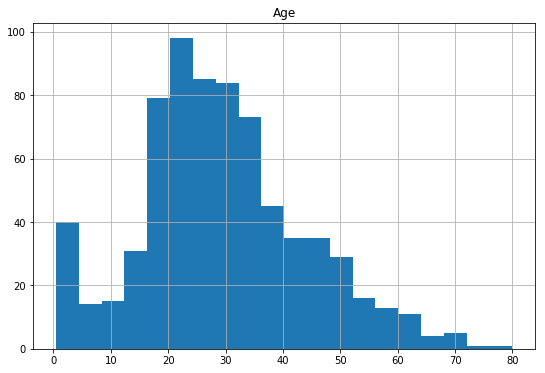

In [30]:
train.hist(column='Age', figsize=(9,6), bins=20)

In [31]:
train["Age"] = train["Age"].fillna(train["Age"].median())

test["Age"] = test["Age"].fillna(test["Age"].median())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027A310CA5F8>]], dtype=object)

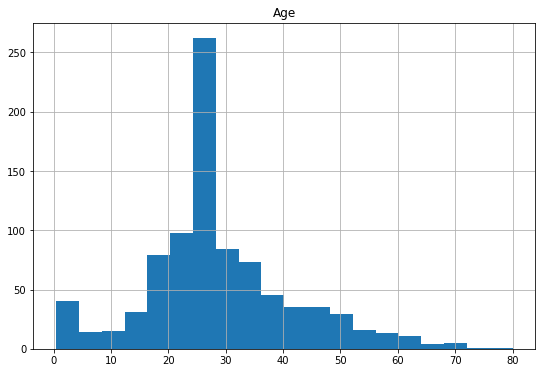

In [32]:
train.hist(column='Age', figsize=(9,6), bins=20)

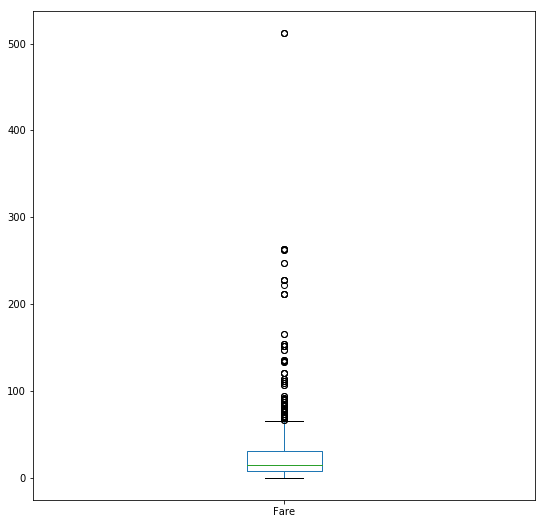

In [37]:
train["Fare"].plot(kind = "box", figsize=(9,9))

In [38]:
train['Embarked'].value_counts()


S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [39]:
train["Embarked"] = train ["Embarked"].fillna("S")


test["Embarked"] = test["Embarked"].fillna("S")

In [40]:
train["Family"] = train["SibSp"] + train["Parch"]

In [43]:
most_family = np.where(train["Family"] == max(train["Family"]))

train.ix[most_family]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
159,160,0,3,"Sage, Master. Thomas Henry",male,28.0,8,2,CA. 2343,69.55,n,S,10
180,181,0,3,"Sage, Miss. Constance Gladys",female,28.0,8,2,CA. 2343,69.55,n,S,10
201,202,0,3,"Sage, Mr. Frederick",male,28.0,8,2,CA. 2343,69.55,n,S,10
324,325,0,3,"Sage, Mr. George John Jr",male,28.0,8,2,CA. 2343,69.55,n,S,10
792,793,0,3,"Sage, Miss. Stella Anna",female,28.0,8,2,CA. 2343,69.55,n,S,10
846,847,0,3,"Sage, Mr. Douglas Bullen",male,28.0,8,2,CA. 2343,69.55,n,S,10
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,28.0,8,2,CA. 2343,69.55,n,S,10


In [44]:
train["Sex"][train["Sex"] == "male"] = 0
train["Sex"][train["Sex"] == "female"] = 1

test["Sex"][test["Sex"] == "male"] = 0
test["Sex"][test["Sex"] == "female"] = 1

F:\anacon\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
F:\anacon\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
F:\anacon\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
F:\anacon\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set 

In [45]:
train["Embarked"][train["Embarked"] == "S"] = 0
train["Embarked"][train["Embarked"] == "C"] = 1
train["Embarked"][train["Embarked"] == "Q"] = 2

test["Embarked"][test["Embarked"] == "S"] = 0
test["Embarked"][test["Embarked"] == "C"] = 1
test["Embarked"][test["Embarked"] == "Q"] = 2

F:\anacon\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
F:\anacon\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
F:\anacon\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
F:\anacon\lib\site-packages\ipykernel_launcher.py:5: SettingWith

In [47]:
from sklearn.linear_model import LogisticRegression

target = train["Survived"].values
features_one = train[["Pclass", "Sex", "Age", "Fare"]].values
logistic_model = LogisticRegression()
logistic_model.fit(features_one, target)

print(logistic_model.coef_)

[[ -1.02929839e+00   2.50906610e+00  -2.84360495e-02   1.55588271e-03]]


In [48]:
preds = logistic_model.predict(X = features_one)
pd.crosstab(preds, train["Survived"])

Survived,0,1
row_0,,
0,469,102
1,80,240


In [49]:
logistic_model.score(X = features_one ,
                y = train["Survived"])

0.79573512906846244

In [50]:
from sklearn import metrics

metrics.confusion_matrix(y_true=train["Survived"],  
                         y_pred=preds)

array([[469,  80],
       [102, 240]], dtype=int64)

In [51]:
print(metrics.classification_report(y_true=train["Survived"],
                              y_pred=preds) )

             precision    recall  f1-score   support

          0       0.82      0.85      0.84       549
          1       0.75      0.70      0.73       342

avg / total       0.79      0.80      0.79       891



KeyError: 'Survived'